In [1]:
pip install kagglehub

Note: you may need to restart the kernel to use updated packages.


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("asaniczka/uk-optimal-product-price-prediction")

print("Path to dataset files:", path)

100%|███████████████████████████████████████████████████████████████████████████████| 117M/117M [01:45<00:00, 1.16MB/s]

Extracting files...


Path to dataset files: C:\Users\Teresa Alexandra\.cache\kagglehub\datasets\asaniczka\uk-optimal-product-price-prediction\versions\3


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")

In [9]:
category_counts = df['category'].value_counts()
print(category_counts.head(10))  # Top 10 categories

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Manicure & Pedicure Products               18940
Skin Care                                  18769
Make-up                                    18756
Hair Care                                  18735
Fragrances                                 18564
Name: count, dtype: int64


In [10]:
top_5_categories = category_counts.head(5)
print("Top 5 categories:\n", top_5_categories)

Top 5 categories:
 category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64


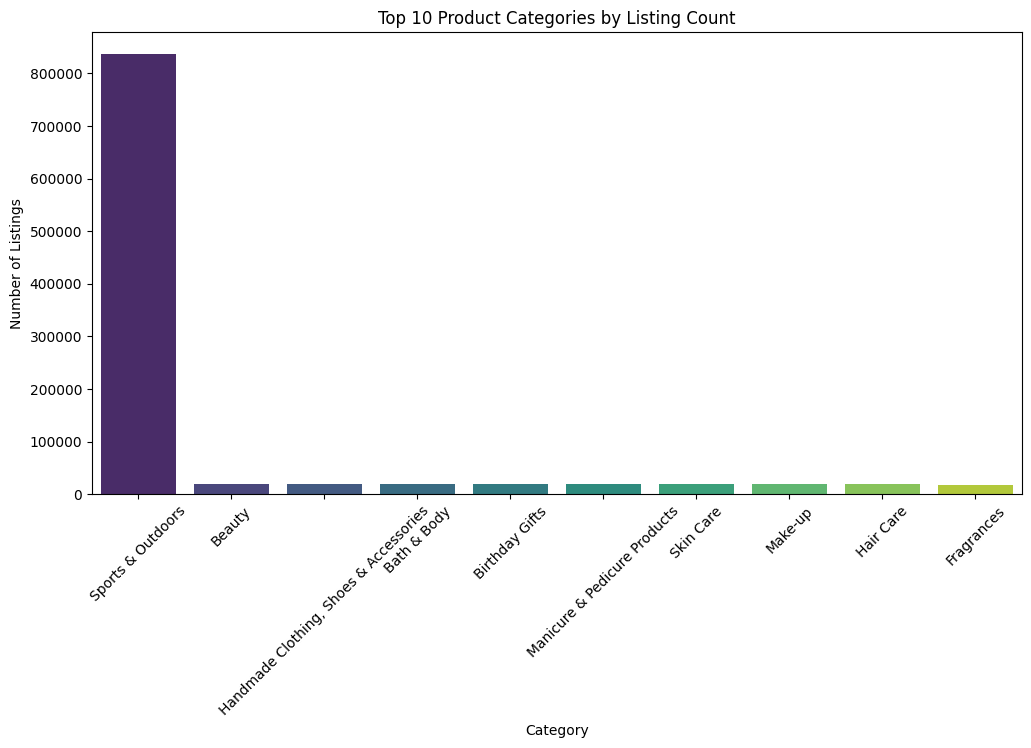

In [13]:
plt.figure(figsize=(12,6))
sns.barplot(
    x=category_counts.index[:10],
    y=category_counts.values[:10],
    hue=category_counts.index[:10],  # assign x to hue
    palette='viridis',
    dodge=False,
    legend=False
)
plt.xticks(rotation=45)
plt.title("Top 10 Product Categories by Listing Count")
plt.xlabel("Category")
plt.ylabel("Number of Listings")
plt.show()

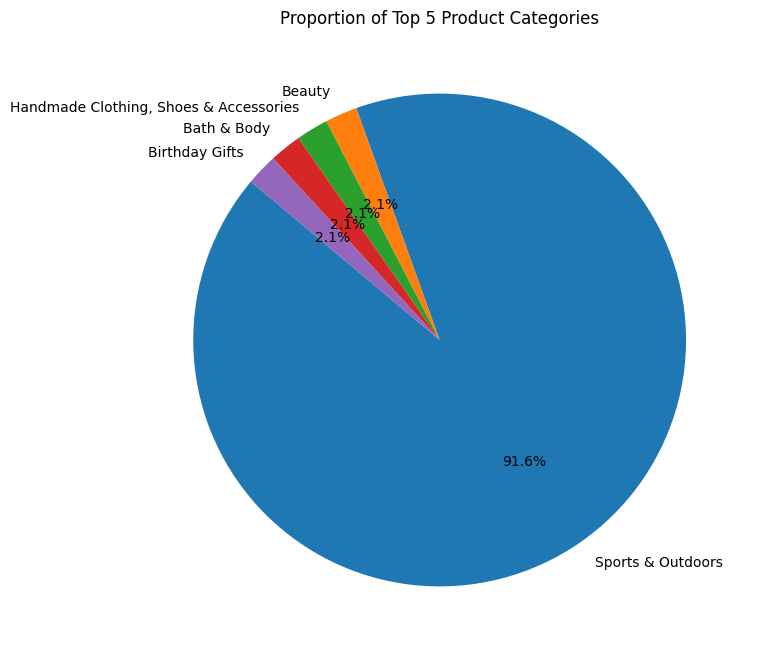

In [14]:
plt.figure(figsize=(8,8))
plt.pie(top_5_categories.values, labels=top_5_categories.index, autopct='%1.1f%%', startangle=140)
plt.title("Proportion of Top 5 Product Categories")
plt.show()

In [15]:
mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()[0]

print(f"Mean price: £{mean_price:.2f}, Median price: £{median_price:.2f}, Mode price: £{mode_price:.2f}")

Mean price: £89.24, Median price: £19.09, Mode price: £9.99


In [16]:
variance_price = df['price'].var()
std_price = df['price'].std()
range_price = df['price'].max() - df['price'].min()
iqr_price = df['price'].quantile(0.75) - df['price'].quantile(0.25)

print(f"Variance: {variance_price:.2f}, Std: {std_price:.2f}, Range: {range_price:.2f}, IQR: {iqr_price:.2f}")

Variance: 119445.49, Std: 345.61, Range: 100000.00, IQR: 36.00


In [20]:
import numpy as np

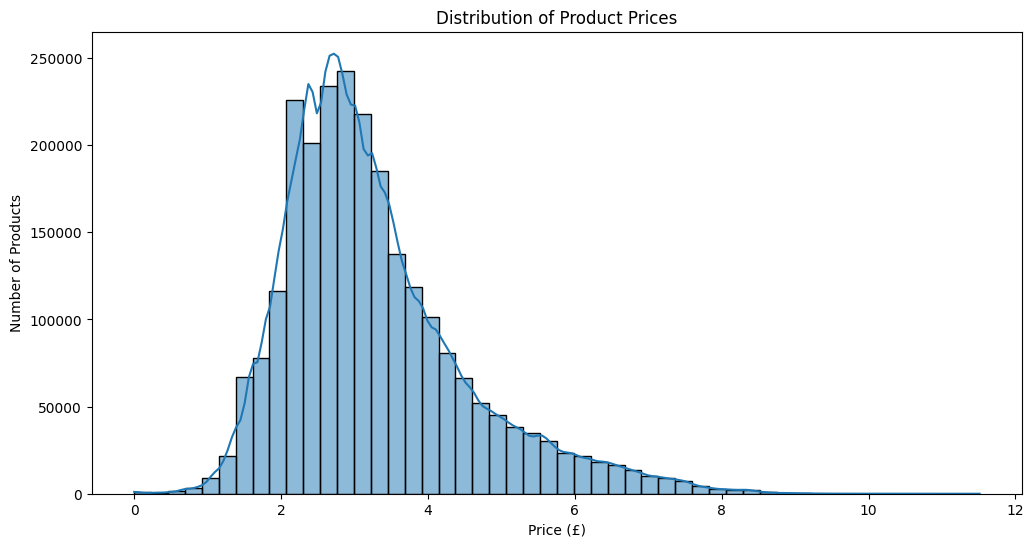

In [21]:
plt.figure(figsize=(12,6))
sns.histplot(np.log1p(df['price']) , bins=50, kde=True)
plt.title("Distribution of Product Prices")
plt.xlabel("Price (£)")
plt.ylabel("Number of Products")
plt.show()

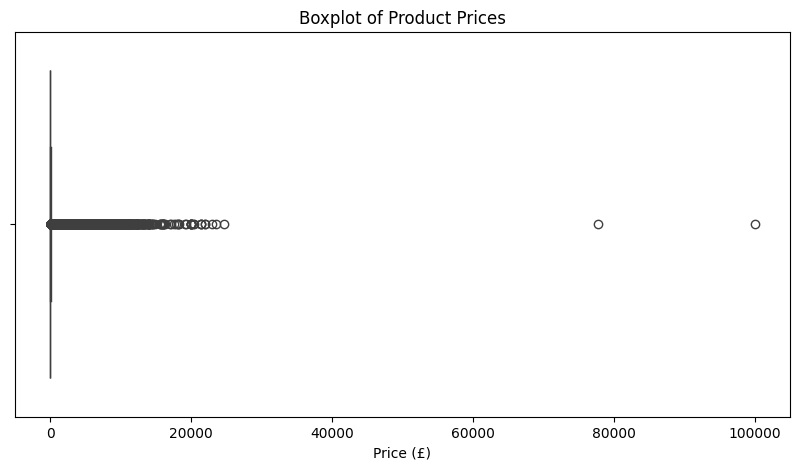

In [22]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['price'])
plt.title("Boxplot of Product Prices")
plt.xlabel("Price (£)")
plt.show()

In [25]:
print(df.columns)

Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')


In [27]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [26]:
mean_rating = df['stars'].mean()
median_rating = df['stars'].median()
mode_rating = df['stars'].mode()[0]

print(f"Mean rating: {mean_rating:.2f}, Median rating: {median_rating:.2f}, Mode rating: {mode_rating:.2f}")

Mean rating: 2.15, Median rating: 0.00, Mode rating: 0.00


In [28]:
variance_rating = df['stars'].var()
std_rating = df['stars'].std()
iqr_rating = df['stars'].quantile(0.75) - df['stars'].quantile(0.25)

print(f"Variance: {variance_rating:.2f}, Std: {std_rating:.2f}, IQR: {iqr_rating:.2f}")

Variance: 4.82, Std: 2.19, IQR: 4.40


In [29]:
from scipy.stats import skew, kurtosis

skewness_rating = skew(df['stars'])
kurtosis_rating = kurtosis(df['stars'])

print(f"Skewness: {skewness_rating:.2f}, Kurtosis: {kurtosis_rating:.2f}")

Skewness: 0.08, Kurtosis: -1.93


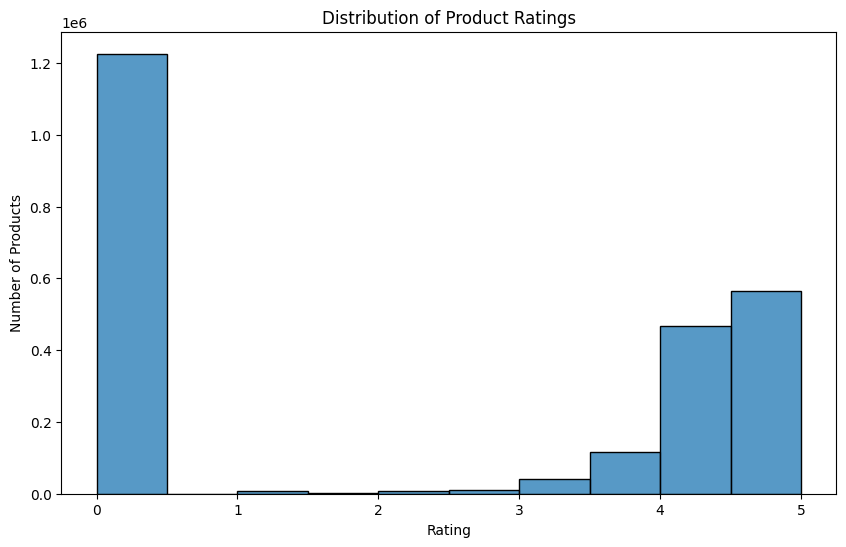

In [31]:
plt.figure(figsize=(10,6))
sns.histplot(df['stars'], bins=10, kde=False)
plt.title("Distribution of Product Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Products")
plt.show()

# Amazon UK Product Analysis Report
# Objective
To analyze the Amazon UK product dataset to extract actionable insights regarding product categories, pricing strategies, and customer ratings. The goal is to inform business decisions related to product positioning, pricing, and inventory management.
# Product Categories
Key Findings:
- The dataset shows a wide variety of product categories, but the top 5 most listed categories dominate the platform.
- Bar chart and pie chart analysis indicate that these categories account for a significant proportion of total listings.
## Top 5 Categories (by listing count):
- Sports & Outdoors
- Beauty
- Handmade Clothing, Shoes & Accessories 
- Bath & Body
- Birthday Gifts 

Business Implications:
- High Competition: Popular categories have many listings, suggesting a competitive market. Businesses should focus on differentiation strategies (unique features, branding, promotions).
- Opportunity for Niche Products: Less frequent categories may offer opportunities for targeted, less competitive product launches.
# Product Pricing
Central Tendency
Mean Price: £89.24
Median Price: £19.09
Mode Price: £9.99
The average price is slightly higher than the most common price, indicating some higher-priced outliers.

Dispersion
Variance: 119445.49
Standard Deviation: 345.61
Range: £100000.00
Interquartile Range (IQR): £36.00
Pricing is moderately varied, with a small number of high-priced products skewing the mean.

Visual Insights
Histogram shows most products cluster within a mid-price range.
Box plot reveals several high-priced outliers.

Business Implications
Competitive Pricing: Businesses should consider pricing products near the median or mode to align with the majority of listings.
Premium Opportunities: High-priced outliers indicate a segment for premium products; brands can leverage quality or exclusivity.

# Customer Ratings
Central Tendency

Mean Rating: 2.15
Median Rating: 0.00
Mode Rating: 0.00

Dispersion

Variance: 4.82
Standard Deviation: 2.19
Interquartile Range: 4.40

Distribution Shape

Skewness: 0.08 (slightly negative, indicating tendency toward higher ratings)
Kurtosis: -1.93 (moderately peaked, suggesting most products are clustered around the average rating)

Visual Insights

Histogram shows that the majority of products have high ratings (4–5 stars).
# Business Implications:
- High Customer Expectations: Most products receive high ratings; maintaining high quality and service is crucial.
- Marketing Leverage: Highlighting products with consistently high ratings can improve trust and conversion.
- Identify Improvement Areas: Low-rated products may indicate gaps in quality or customer experience that can be targeted for improvement.
# Strategic Recommendations
1.	Category Positioning
- Consider entering niche categories for differentiation.
- For popular categories, focus on branding and value-added services to stand out.
2.	Pricing Strategy
- Align most products around median/mode price to remain competitive.
- Explore premium pricing for differentiated products, supported by strong marketing and high-quality ratings.
3.	Customer Experience & Ratings
- Monitor ratings consistently to maintain high customer satisfaction.
- Encourage customer reviews to build trust and increase visibility in competitive categories.
4.	Inventory Planning
- Stock products in high-demand categories while testing niche categories for growth opportunities.
- Track outliers in pricing and ratings to adjust marketing, promotions, and product mix.
# Conclusion
The Amazon UK product landscape is highly competitive in popular categories, with mid-range prices dominating the market and high customer ratings being common. Businesses can optimize performance by strategically selecting categories, pricing products effectively, and focusing on quality and customer satisfaction to maintain strong ratings.